In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [4]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [5]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [6]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [7]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [20]:
x=df.iloc[:,1:2]  
y=df.iloc[:,-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [9]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

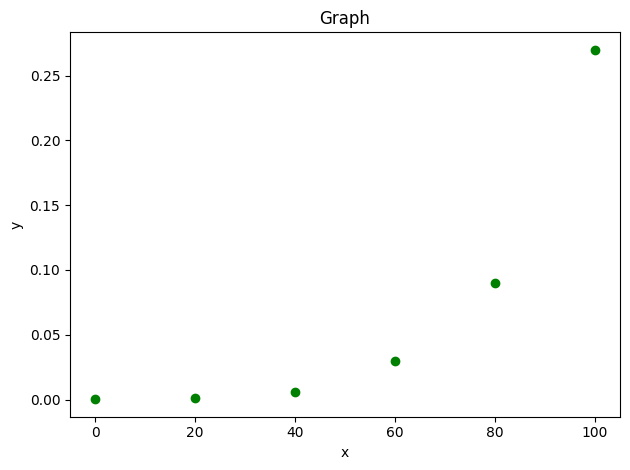

In [10]:
plt.scatter(x,y,color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph")
plt.tight_layout()
plt.show()

In [11]:
#Model_Creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

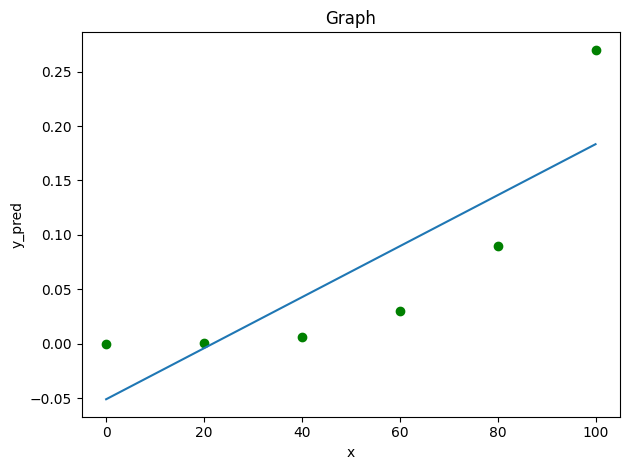

In [12]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred)
plt.xlabel("x")
plt.ylabel("y_pred")
plt.title("Graph")
plt.tight_layout()

In [13]:
#Performanace Evaluation Methods
#______________________________________________________________

from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y,y_pred))
print('R2_Square is',r2_score(y,y_pred))

Mean Absolute Percentage Error is 44.775078189300416
R2_Square is 0.690349972603981


In [14]:
#here MAPE is high and r2score is low, so for changing the values we use polynomial regression

In [15]:
#Polynomial_Regression

from sklearn.preprocessing import PolynomialFeatures
feature=PolynomialFeatures(degree=3)  #there is 3 feature
x_poly=feature.fit_transform(x)
x_poly  #here we change the feature of x into 4 by using polynomial regression 

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [16]:
#Model Creation

model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [17]:
#Dataframe b/w Actual value, value predicted by simple regression , value predicted by polynomial regression

df1 = pd.DataFrame({'Actual_value': y,'Predicted_value_Simple_Regression': y_pred,'Predicted_value_Polynomial_Regression': y_poly})
print(df1) 

   Actual_value  Predicted_value_Simple_Regression  \
0        0.0002                          -0.050867   
1        0.0012                          -0.004027   
2        0.0060                           0.042813   
3        0.0300                           0.089653   
4        0.0900                           0.136493   
5        0.2700                           0.183333   

   Predicted_value_Polynomial_Regression  
0                              -0.001989  
1                               0.007244  
2                               0.003711  
3                               0.022489  
4                               0.098656  
5                               0.267289  


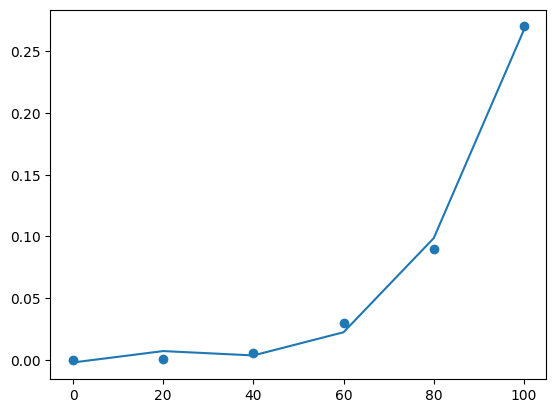

In [18]:
plt.scatter(x,y)
plt.plot(x,y_poly)

In [19]:
#Performanace Evaluation Methods
#______________________________________________________________

from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y,y_poly))
print('R2_Square is',r2_score(y,y_poly))

Mean Absolute Percentage Error is 2.7865912208924066
R2_Square is 0.9966691251761722
